In [86]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

Define helper functions:<br>
• rectContains: Checks whether or not point is located within a rectangle (for subdiv function)<br>
• drawPoint: Draws a point on the input image in the form of a circle

In [87]:
def rectContains(rectangle, point):
    if point[0] < rectangle[0]:
        return False
    elif point[1] < rectangle[1]:
        return False
    elif point[0] > rectangle[2]:
        return False
    elif point[1] > rectangle[3]:
        return False
    return True

def drawPoint(img, p, colour):
    cv2.circle(img, p, 12, colour, cv2.FILLED, 16, 0)

Draw Delaunay triangulation.

In [88]:
def delaunay(img, subdiv, delaunay_colour):
    triangleList = subdiv.getTriangleList()
    size = img.shape
    r = (0, 0, size[1], size[0])
    
    for t in triangleList:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        if rectContains(r, pt1) and rectContains(r, pt2) and rectContains(r, pt3):
            cv2.line(img, pt1, pt2, delaunay_colour, 1, 16, 0)
            cv2.line(img, pt2, pt3, delaunay_colour, 1, 16, 0)
            cv2.line(img, pt3, pt1, delaunay_colour, 1, 16, 0)

Draw Voronoi diagram.

In [89]:
def voronoi(img, subdiv):
    (facets, centers) = subdiv.getVoronoiFacetList([])
    
    for i in range(0, len(facets)):
        ifacet_arr = []
        for f in facets[i]:
            ifacet_arr.append(f)
            
        ifacet = np.array(ifacet_arr, np.int)
        colour = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        
        cv2.fillConvexPoly(img, ifacet, colour, 16, 0)
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 255), 8, 16, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 10, (0, 0, 255), cv2.FILLED)

Main function reading in the input image and performing the Delaunay triangulation and Voronoi diagram generation.

(1280, 1920, 3)


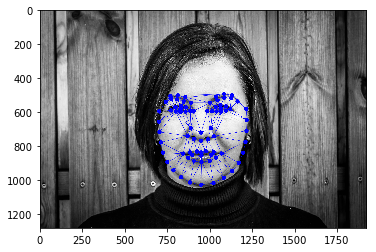

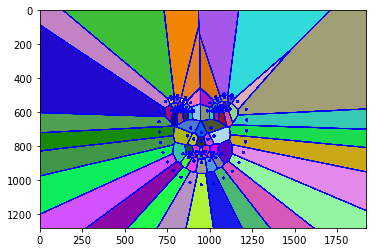

In [95]:
img = cv2.imread("Face2.jpg")
img_orig = img.copy()

size = img.shape
rect = (0, 0, size[1], size[0])

points = []
subdiv = cv2.Subdiv2D(rect)

with open("Face2Points.txt") as file:
    for line in file:
        x, y = line.split()
        points.append((int(x), int(y)))

for p in points:
    subdiv.insert(p)
    drawPoint(img, p, (0, 0, 255))
    
delaunay(img, subdiv, (0, 0, 255))
img_voronoi = np.zeros(img.shape, dtype = img.dtype)
voronoi(img_voronoi, subdiv)

print(size)
plt.imshow(img)
plt.show()
plt.imshow(img_voronoi)
plt.show()